# Causal Graphical Models and Causal Inference with Python

by Emil Vassev

October 10, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Introduction

### Defining Cosality 
If X and Y are random variables, "cosality" is about how the probability of Y will change when we force X to take a certain value. This act of forcing a variable to take a certain value is called an **intervention**.

$P(Y|do(X))$

In this interactive lecture, we will create causal graphical models with Python and run causal inference on them. To build causal models with Python, we will use the $causalgraphicalmodels$ library. This library supports the description and manipulation of Causal Graphical Models and Structural Causal Models. You can find this library here: https://github.com/ijmbarr/causalgraphicalmodels

In [1]:
from causalgraphicalmodels import CausalGraphicalModel

## Sprinkler Causal Graphical Model
The first causal model is the Sprinkler example covered by the lectures. It is a system of five variables indicating conditions:

* season: indicates which season it is
* rain: indicates whether it is raining
* sprinkler: indicates whether our sprinkler is on
* wet: indicates whether the group is wet
* slippery: indicates whether the ground is slippery

Here, when it rains, the ground becomes wet, however making the ground wet doesn't mean it rains. We have a set of variables and directed relationships between them. A natural way to represent this structure is a Directed Acyclic Graph. We require the graph to be acyclic to prevent "causal loops".


### Step 1. Create the DAG of the Causal Network

we use the CausalGraphicalModel class to create the DAG of the "Sprinkler" Causal Network:
* provide an array of nodes
* provide an array of edges

In [2]:
sprinkler = CausalGraphicalModel(
    nodes=["season", "rain", "sprinkler", "wet", "slippery"],
    edges=[
        ("season", "rain"), 
        ("season", "sprinkler"), 
        ("rain", "wet"),
        ("sprinkler", "wet"), 
        ("wet", "slippery")
    ]
)

### Step 2. Show the DAG of the Causal Network

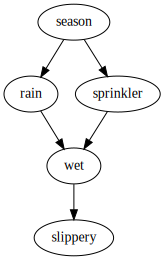

In [3]:
# draw the graphical model
sprinkler.draw()

### Step 3. Show the Joint Dstribution of the Causal Network

Causal factorization implies that the joint probability distribution over all variables can be factorized in the following way:

$P(X) = \prod_{i}P(X_{i}|PA(X{i})$

where $PA(X{i})$ is the set of parents of the variable $X{i}$, with respect to the graph.

We can get the join probability distribution implied by our causal graphical model using the **get_distribution()** method.

In [4]:
print(sprinkler.get_distribution())

P(season)P(rain|season)P(sprinkler|season)P(wet|rain,sprinkler)P(slippery|wet)


### Step 4. Inspect Independence Relationships 

The factorization of the joint probability distribution implies certain **conditional independence relationships** between variables. Considering **probabilistic graphical models**, two variables are conditionally independent given other variables if they follow the **Common Cause Principle** (d-separation):

If two observables (random variables) $X $and $Y$ are statistically dependent, then there exists a variable $Z$ that
* causally influences both $X$ and $Y$
* explains their dependence by considering them independent when conditioned on $Z$

**Example**: If we know whether the ground is wet, then whether it is slippery is independent of the season.

We can retrieve all independence relationships implied by the graph in the sprinkler system.

In [5]:
sprinkler.get_all_independence_relationships()

[('rain', 'sprinkler', {'season'}),
 ('rain', 'slippery', {'wet'}),
 ('rain', 'slippery', {'season', 'wet'}),
 ('rain', 'slippery', {'sprinkler', 'wet'}),
 ('rain', 'slippery', {'season', 'sprinkler', 'wet'}),
 ('wet', 'season', {'rain', 'sprinkler'}),
 ('wet', 'season', {'rain', 'slippery', 'sprinkler'}),
 ('sprinkler', 'slippery', {'wet'}),
 ('sprinkler', 'slippery', {'rain', 'wet'}),
 ('sprinkler', 'slippery', {'season', 'wet'}),
 ('sprinkler', 'slippery', {'rain', 'season', 'wet'}),
 ('slippery', 'season', {'wet'}),
 ('slippery', 'season', {'rain', 'wet'}),
 ('slippery', 'season', {'rain', 'sprinkler'}),
 ('slippery', 'season', {'sprinkler', 'wet'}),
 ('slippery', 'season', {'rain', 'sprinkler', 'wet'})]

We can use the **is_d_separated()** method to check whether two variables are unconditionally or conditionally independent. 

In [6]:
print("Are 'rain' and 'sprinkler' unconditionally independent? {} "
      .format(sprinkler.is_d_separated("rain", "sprinkler", {})))

Are 'rain' and 'sprinkler' unconditionally independent? False 


In [7]:
print("Are 'rain' and 'sprinkler' conditionally independent? {} "
      .format(sprinkler.is_d_separated("rain", "sprinkler", {"season"})))

Are 'rain' and 'sprinkler' conditionally independent? True 


### Step 5. Run the intervention do("sprinkler") on the Causal Network

In [8]:
sprinkler_do = sprinkler.do("sprinkler")

### Step 6. Show the Causal DAG with the intervention "on"

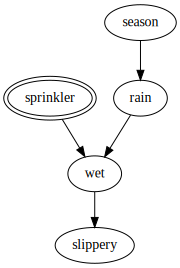

In [9]:
sprinkler_do.draw()

### Step 7. Show the Joint Distibution of the Causal Network with the intervention "on"

In [10]:
print(sprinkler_do.get_distribution())

P(season)P(rain|season)P(wet|rain,do(sprinkler))P(slippery|wet)


### Step 8. Compare Joint Distributions
Joint distribution without interventions: <br>
<b>P(season)P(rain|season)P(sprinkler|season)P(wet|rain,sprinkler)P(slippery|wet)</b>
<br><br>
Joint distribution with <i>do("sprinkler")</i> intervention: <br>
<b>P(season)P(rain|season)P(wet|rain,do(sprinkler))P(slippery|wet)</b>

## Causal Graphical Model of "Bad Construction Management"

In this real-life scenario, we are going to build a Causal Graphical Model by using the <b>causalgraphicalmodels</b> library and do interventions on this model. This model needs to cover a real-life scenario targeting bad construction management. 

### The Real-Life Scenario
Every construction job needs good project management in order to get everything done correctly and on time. Sometimes, it’s possible for things to get out of hand for a number of reasons. It might be the inexperience of the contractor or outside circumstances like weather, but most of the time it’s due to the job site or project not being properly managed.

In this exercise, we are going to use the following set of random variables X = {X1, X2, ... , X14} expressing elements of bad construction management:
<ul>
<li>X1 = “contractor concerned with making profits”</li> 
<li>X2 = “building costs minimized”</li> 
<li>X3 = “cheap materials used”</li>
<li>X4 = “lack of enforcement on building standards”</li> 
<li>X5 = “building regulations ignored when cheaper”</li>
<li>X6 = “overcrowded”</li>
<li>X7 = “no fire exits”</li> 
<li>X8 = “building too high”</li>
<li>X9 = “unsafe building”</li>
<li>X10 = “workers unable to adequately represent their rights”</li> 
<li>X11 = “workers work on low wages”</li> 
<li>X12 = “workers work in unsafe buildings”</li> 
<li>X13 = “workers forced to state late to meet quotas”</li>
<li>X14 = “injuries and loss of life”</li>
</ul>

Here, we are going to use our logic to build a <b>realistic</b> causal network. In this network, the parent-child relationships should be deduced based on our logic. We need to use all random variables X = {X1, X2, ... , X14} for our model.

### Note
* Causal graphical models are *non-parametric*, i.e., they do not make any assumptions about the functional form of relationships between variables, only that they exist. 
* The only testable assumption these models make are the *conditional independence relationships* between the variables. 
* Testing conditional independence, in the general case, is impossible. 
* There are many possible DAGs for even a reasonable number of variables, discovering causal structure from observational data alone is very difficult.

### Step 1. Create the DAG of the Causal Network

In [11]:
constructionManagement_text = CausalGraphicalModel(
    nodes=["contractor concerned with making profits", "building costs minimized", 
           "cheap materials used", "lack of enforcement on building standards", 
           "building regulations ignored when cheaper", "overcrowded", "no fire exits", 
           "building too high", "unsafe building", "workers unable to adequately represent their rights",
           "workers work on low wages", "workers work in unsafe buildings",
           "workers forced to state late to meet quotas","injuries and loss of life"],
    edges=[
        ("contractor concerned with making profits", "building costs minimized"), 
        ("contractor concerned with making profits", "cheap materials used"), 
        ("contractor concerned with making profits", "building regulations ignored when cheaper"),
        ("contractor concerned with making profits", "workers work on low wages"),
        ("contractor concerned with making profits", "workers forced to state late to meet quotas"),
        
        ("lack of enforcement on building standards","building regulations ignored when cheaper"), 
        
        ("workers unable to adequately represent their rights", "workers work on low wages"),
        ("workers unable to adequately represent their rights", "workers work in unsafe buildings"),
        ("workers unable to adequately represent their rights", "workers forced to state late to meet quotas"),
         
        ("building regulations ignored when cheaper", "overcrowded"),
        ("building regulations ignored when cheaper", "no fire exits"),
        ("building regulations ignored when cheaper", "building too high"),
        
        ("overcrowded", "unsafe building"), 
        ("no fire exits", "unsafe building"),
        ("building too high", "unsafe building"),
        ("cheap materials used", "unsafe building"),
        
        ("unsafe building", "workers work in unsafe buildings"),
        
        ("workers work in unsafe buildings", "injuries and loss of life"),
        ("workers forced to state late to meet quotas","injuries and loss of life")

    ]
)

In [12]:
constructionManagement = CausalGraphicalModel(
    nodes=["x1", "x2", 
           "x3", "x4", 
           "x5", "x6", "x7", 
           "x8", "x9", "x10",
           "x11", "x12",
           "x13","x14"],
    edges=[
        ("x1", "x2"), 
        ("x1", "x3"), 
        ("x1", "x5"),
        ("x1", "x11"),
        ("x1", "x13"),
        
        ("x4","x5"), 
        
        ("x10", "x11"),
        ("x10", "x12"),
        ("x10", "x13"),
         
        ("x5", "x6"),
        ("x5", "x7"),
        ("x5", "x8"),
        
        ("x6", "x9"), 
        ("x7", "x9"),
        ("x8", "x9"),
        ("x3", "x9"),
        
        ("x9", "x12"),
        
        ("x12", "x14"),
        ("x13","x14")

    ]
)

### Step 2. Show the DAG of the Causal Network

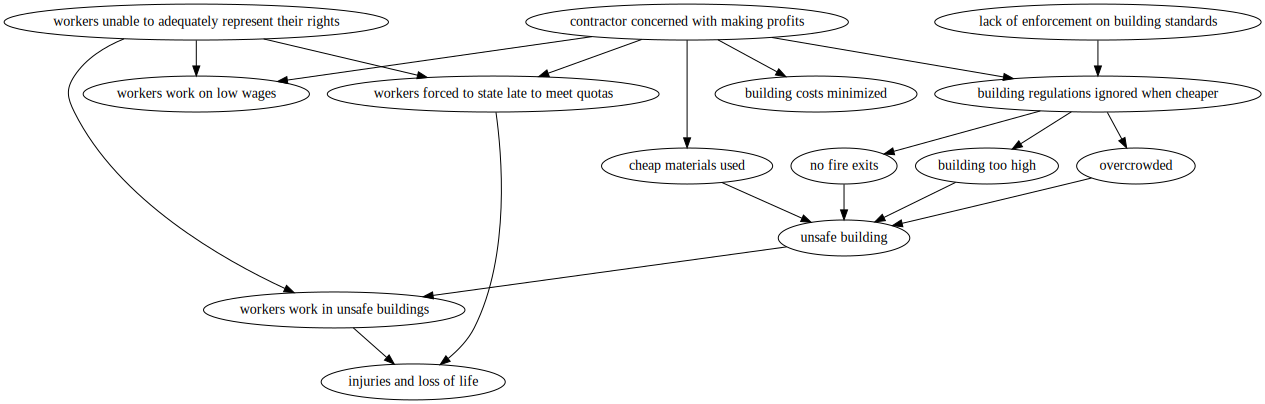

In [13]:
# draw return a graphviz `dot` object, which jupyter can render
constructionManagement_text.draw()

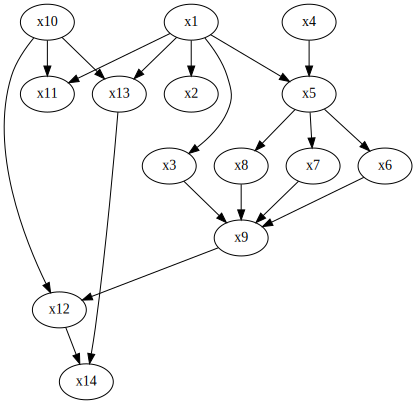

In [14]:
# draw return a graphviz `dot` object, which jupyter can render
constructionManagement.draw()

### Step 3. Show the Joint Dstribution of the Causal Network

In [15]:
print(constructionManagement.get_distribution())

P(x1)P(x4)P(x10)P(x2|x1)P(x3|x1)P(x5|x1,x4)P(x11|x1,x10)P(x13|x1,x10)P(x6|x5)P(x7|x5)P(x8|x5)P(x9|x6,x7,x8,x3)P(x12|x10,x9)P(x14|x12,x13)


### Step 4. Inspect Independence Relationships 
We can retrieve all independence relationships implied by the graph in the "Bad Construction Management" system.

In [16]:
constructionManagement_text.get_all_independence_relationships()

[('cheap materials used',
  'no fire exits',
  {'contractor concerned with making profits'}),
 ('cheap materials used',
  'no fire exits',
  {'building regulations ignored when cheaper'}),
 ('cheap materials used',
  'no fire exits',
  {'contractor concerned with making profits',
   'workers forced to state late to meet quotas'}),
 ('cheap materials used',
  'no fire exits',
  {'building regulations ignored when cheaper',
   'workers forced to state late to meet quotas'}),
 ('cheap materials used',
  'no fire exits',
  {'building too high', 'contractor concerned with making profits'}),
 ('cheap materials used',
  'no fire exits',
  {'building regulations ignored when cheaper',
   'contractor concerned with making profits'}),
 ('cheap materials used',
  'no fire exits',
  {'building costs minimized', 'contractor concerned with making profits'}),
 ('cheap materials used',
  'no fire exits',
  {'contractor concerned with making profits', 'workers work on low wages'}),
 ('cheap materials u

We do some additional independence checks.

In [17]:
print("Are 'workers unable to adequately represent their rights' and 'contractor concerned with making profits' unconditionally independent? {} "
      .format(constructionManagement_text.is_d_separated("workers unable to adequately represent their rights", "contractor concerned with making profits", {})))

Are 'workers unable to adequately represent their rights' and 'contractor concerned with making profits' unconditionally independent? True 


In [18]:
print("Are 'workers forced to state late to meet quotas' and 'building costs minimized' unconditionally independent? {} "
      .format(constructionManagement_text.is_d_separated("workers forced to state late to meet quotas", "building costs minimized", {})))

Are 'workers forced to state late to meet quotas' and 'building costs minimized' unconditionally independent? False 


In [19]:
print("Are 'workers forced to state late to meet quotas' and 'building costs minimized' conditionally independent? {} "
      .format(constructionManagement_text.is_d_separated("workers forced to state late to meet quotas", "building costs minimized", {"contractor concerned with making profits"})))

Are 'workers forced to state late to meet quotas' and 'building costs minimized' conditionally independent? True 


### Step 5. Run the intervention do("unsafe building") on the Causal Network

In [20]:
constructionManagement_text_do = constructionManagement_text.do("unsafe building")
constructionManagement_do = constructionManagement.do("x9")

### Step 6. Show the Causal DAG with the intervention "on"

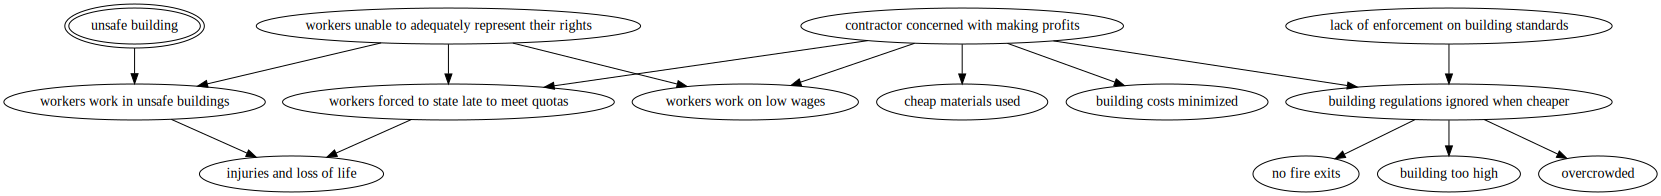

In [21]:
constructionManagement_text_do.draw()

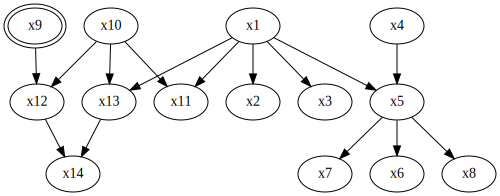

In [22]:
constructionManagement_do.draw()

### Step 7. Show the Joint Distibution of the Causal Network with the intervention "on"

In [23]:
print(constructionManagement_do.get_distribution())

P(x10)P(x4)P(x1)P(x12|do(x9),x10)P(x2|x1)P(x3|x1)P(x5|x1,x4)P(x11|x1,x10)P(x13|x1,x10)P(x6|x5)P(x7|x5)P(x8|x5)P(x14|x12,x13)


### Step 8. Compare Joint Distributions
Joint distribution without interventions: <br>
<b>P(x1)P(x4)P(x10)P(x2|x1)P(x3|x1)P(x5|x1,x4)P(x11|x1,x10)P(x13|x1,x10)P(x6|x5)P(x7|x5)P(x8|x5)P(x9|x6,x7,x8,x3)P(x12|x10,x9)P(x14|x12,x13)</b>
<br><br>
Joint distribution with <i>do("unsafe building")</i> intervention: <br>
<b>P(x10)P(x1)P(x4)P(x2|x1)P(x3|x1)P(x11|x1,x10)P(x13|x1,x10)P(x12|do(x9),x10)P(x5|x1,x4)P(x14|x12,x13)P(x6|x5)P(x7|x5)P(x8|x5)</b>